# Preliminary Steps

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/code/benchmarking_vg/synthetic_images/UNIT/
!pip install -r requirements.txt

/content/drive/.shortcut-targets-by-id/1Bhjr1R18hwR6QcFD4OoKnyy0schft1OT/code/benchmarking_vg/synthetic_images/UNIT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Visualization of example images in the Pitts30k dataset

We visualize one or more images found in the Pitts30k dataset. This is just to have a general idea of what kind of pictures we could have. We also show some basic information such as the size of the images

In [3]:
from PIL import Image #this cell takes about 5 minutes and the database database folder in the train contains 10k pictures
import glob
image_list = []
for filename in glob.glob('/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k/images/train/database/*.jpg'):
  im=Image.open(filename)
  image_list.append(im)

In [ ]:
len(image_list)

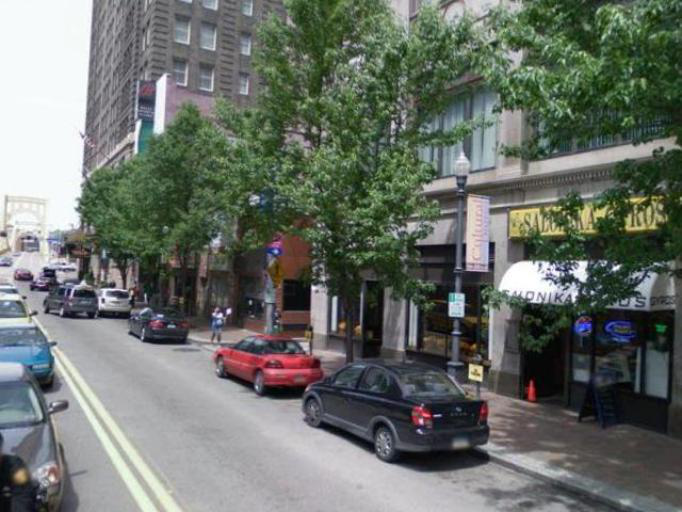

In [6]:
image_list[100]


# ***Test the night transformation with all the UNIT PT models***


The "UNIT PT models" folder contains all the pretrained models found in the github folder https://github.com/solesensei/day2night. All these models are supposed to generate a synthetic night image starting from a day image (or vice versa based on the parameter a2b). We tested all these models to see which one would work best on the pitts30k dataset.
To see which one gives us the most realistic results we used some sample images from the pitts30k dataset and transformed them to night domain. 
The best result obtained will later be used to transform to night domain the entire pitts30k dataset.

In [ ]:
# MUNIT_VGG
!python test.py --trainer=MUNIT --config="UNIT PT models/MUNIT_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/munit_vgg --checkpoint="UNIT PT models/MUNIT_VGG/gen_01000000.pt" 

In [ ]:
#UNIT
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_bis --checkpoint="UNIT PT models/UNIT/gen_00388000.pt" --a2b=1

In [ ]:
# UNIT (instance)
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT (instance)/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_instance_bis --checkpoint="UNIT PT models/UNIT (instance)/gen_00799000.pt" --a2b=1

In [ ]:
# UNIT (layer norm)
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT (layer norm)/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_layernorm_bis --checkpoint="UNIT PT models/UNIT (layer norm)/gen_00470000.pt" --a2b=1

In [ ]:
# UNIT_512x288
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_1bis --checkpoint="UNIT PT models/UNIT_512x288/gen_00353000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_2bis --checkpoint="UNIT PT models/UNIT_512x288/gen_00525000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_3bis --checkpoint="UNIT PT models/UNIT_512x288/gen_00822000.pt" --a2b=1

In [ ]:
# UNIT_512x288_VGG      best model found
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_VGG_1 --checkpoint="UNIT PT models/UNIT_512x288_VGG/gen_00256000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_VGG_2 --checkpoint="UNIT PT models/UNIT_512x288_VGG/gen_00473000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_512x288_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_512x288_VGG_3 --checkpoint="UNIT PT models/UNIT_512x288_VGG/gen_00716000.pt" --a2b=1

In [ ]:
# UNIT_BDD_NEXET
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_bis --checkpoint="UNIT PT models/UNIT_BDD_NEXET/gen_00762000.pt" --a2b=1

In [ ]:
# UNIT_BDD_NEXET_VGG
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG/gen_01000000.pt" --a2b=1

In [ ]:
# UNIT_BDD_NEXET_VGG_IN
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_IN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_IN_1 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_IN/gen_00351000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_IN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_IN_2 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_IN/gen_00351000.pt" --a2b=1

In [ ]:
# UNIT_BDD_NEXET_VGG_LN
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_1 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00175000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_2 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00230000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_3 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00340000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_4 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00410000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_5 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00510000.pt" --a2b=1
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_BDD_NEXET_VGG_LN_6 --checkpoint="UNIT PT models/UNIT_BDD_NEXET_VGG_LN/gen_00630000.pt" --a2b=1

In [ ]:
# UNIT_VGG
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_VGG/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_VGG --checkpoint="UNIT PT models/UNIT_VGG/gen_01000000.pt" --a2b=1

In [ ]:
# UNIT_VGG (batch norm)
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_VGG (batch norm)/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_VGG_batchnorm --checkpoint="UNIT PT models/UNIT_VGG (batch norm)/gen_01000000.pt" --a2b=1

In [ ]:
# UNIT_VGG (instance norm)
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_VGG (instance norm)/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_VGG_instancenorm --checkpoint="UNIT PT models/UNIT_VGG (instance norm)/gen_00759000.pt" --a2b=1

In [ ]:
# UNIT_VGG (layer norm) 128px
!python test.py --trainer=UNIT --config="UNIT PT models/UNIT_VGG (layer norm) 128px/config.yaml" --input="pitts30k/images/train/database/@0584529.19@4477514.65@17@T@040.44398@-080.00325@003258@35@@@@@@pitch2_yaw12@.jpg" --output_folder=results/unit_VGG_layernorm_128px --checkpoint="UNIT PT models/UNIT_VGG (layer norm) 128px/gen_01000000.pt" --a2b=1

# Compare results obtained with UNIT PT models
With the help of this comparison we chose the model that created the most realistic night image starting from the input day image. We chose the UNIT_512x288_VGG model

In [ ]:
#first of all we check the results obtained with the munit model (there are 10 possible ouputs from this model)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
input=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/input.jpg")
munit0=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit0.jpg")
munit1=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit1.jpg")
munit2=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit2.jpg")
munit3=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit3.jpg")
munit4=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit4.jpg")
munit5=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit5.jpg")
munit6=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit6.jpg")
munit7=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit7.jpg")
munit8=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit8.jpg")
munit9=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/munit_output/munit9.jpg")

input=cv2.resize(input,(168,128))

In [ ]:
Horizontal1=np.hstack([input,munit1,munit2,munit3,munit4])
Horizontal2=np.hstack([munit5,munit6,munit7,munit8,munit9])
munit_collage=np.vstack([Horizontal1,Horizontal2])

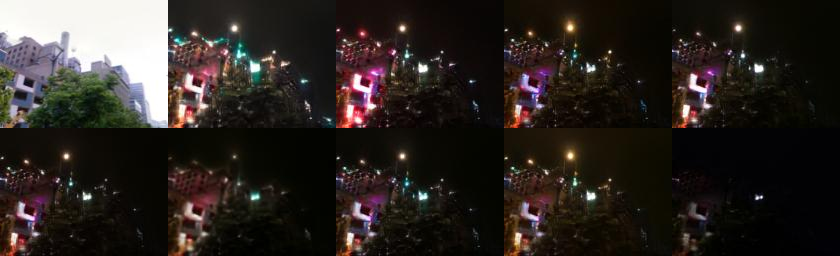

In [ ]:
cv2_imshow(munit_collage)

In [ ]:
#Now let's see the other results
input=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/input.jpg")
input=cv2.resize(input,(340,256))
unit_512x288_1=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_1.jpg")
unit_512x288_1=cv2.resize(unit_512x288_1,(340,256))
unit_512x288_2=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_2.jpg")
unit_512x288_2=cv2.resize(unit_512x288_2,(340,256))
unit_512x288_3=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_3.jpg")
unit_512x288_3=cv2.resize(unit_512x288_3,(340,256))
unit_512x288_VGG_1=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_VGG_1.jpg")
unit_512x288_VGG_1=cv2.resize(unit_512x288_VGG_1,(340,256))
unit_512x288_VGG_2=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_VGG_2.jpg")
unit_512x288_VGG_2=cv2.resize(unit_512x288_VGG_2,(340,256))
unit_512x288_VGG_3=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_512x288_VGG_3.jpg")
unit_512x288_VGG_3=cv2.resize(unit_512x288_VGG_3,(340,256))
unit_BDD_NEXET=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET.jpg")
unit_BDD_NEXET = cv2.resize(unit_BDD_NEXET,(340,256))
unit_BDD_NEXET_VGG_IN_1=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_1.jpg")
unit_BDD_NEXET_VGG_IN_1 = cv2.resize(unit_BDD_NEXET_VGG_IN_1,(340,256))
unit_BDD_NEXET_VGG_IN_2=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_2.jpg")
unit_BDD_NEXET_VGG_IN_2 = cv2.resize(unit_BDD_NEXET_VGG_IN_2,(340,256))
unit_BDD_NEXET_VGG_IN_3=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_3.jpg")
unit_BDD_NEXET_VGG_IN_3 = cv2.resize(unit_BDD_NEXET_VGG_IN_3,(340,256))
unit_BDD_NEXET_VGG_IN_4=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_4.jpg")
unit_BDD_NEXET_VGG_IN_4 = cv2.resize(unit_BDD_NEXET_VGG_IN_4,(340,256))
unit_BDD_NEXET_VGG_IN_5=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_5.jpg")
unit_BDD_NEXET_VGG_IN_5 = cv2.resize(unit_BDD_NEXET_VGG_IN_5,(340,256))
unit_BDD_NEXET_VGG_IN_6=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_BDD_NEXET_VGG_IN_6.jpg")
unit_BDD_NEXET_VGG_IN_6 = cv2.resize(unit_BDD_NEXET_VGG_IN_6,(340,256))
unit_VGG=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_VGG.jpg")
unit_VGG=cv2.resize(unit_VGG,(340,256))
unit_VGG_batchnorm=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_VGG_batchnorm.jpg")
unit_VGG_batchnorm=cv2.resize(unit_VGG_batchnorm,(340,256))
unit_VGG_instancenorm=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_VGG_instancenorm.jpg")
unit_VGG_instancenorm=cv2.resize(unit_VGG_instancenorm,(340,256))
unit_VGG_layernorm=cv2.imread("/content/drive/MyDrive/code/synthetic_images/UNIT/results/all_outputs_w/unit_VGG_layernorm.jpg")
unit_VGG_layernorm=cv2.resize(unit_VGG_layernorm,(340,256))

In [ ]:
H1=np.hstack([input,unit_512x288_1,unit_512x288_2,unit_512x288_3,unit_512x288_VGG_1,unit_512x288_VGG_2])
H2=np.hstack([unit_512x288_VGG_3,unit_BDD_NEXET,unit_BDD_NEXET_VGG_IN_1,unit_BDD_NEXET_VGG_IN_2,unit_BDD_NEXET_VGG_IN_3,unit_BDD_NEXET_VGG_IN_4])
H3=np.hstack([unit_BDD_NEXET_VGG_IN_5,unit_BDD_NEXET_VGG_IN_6,unit_VGG,unit_VGG_batchnorm,unit_VGG_instancenorm,unit_VGG_layernorm])
collage=np.vstack([H1,H2,H3])

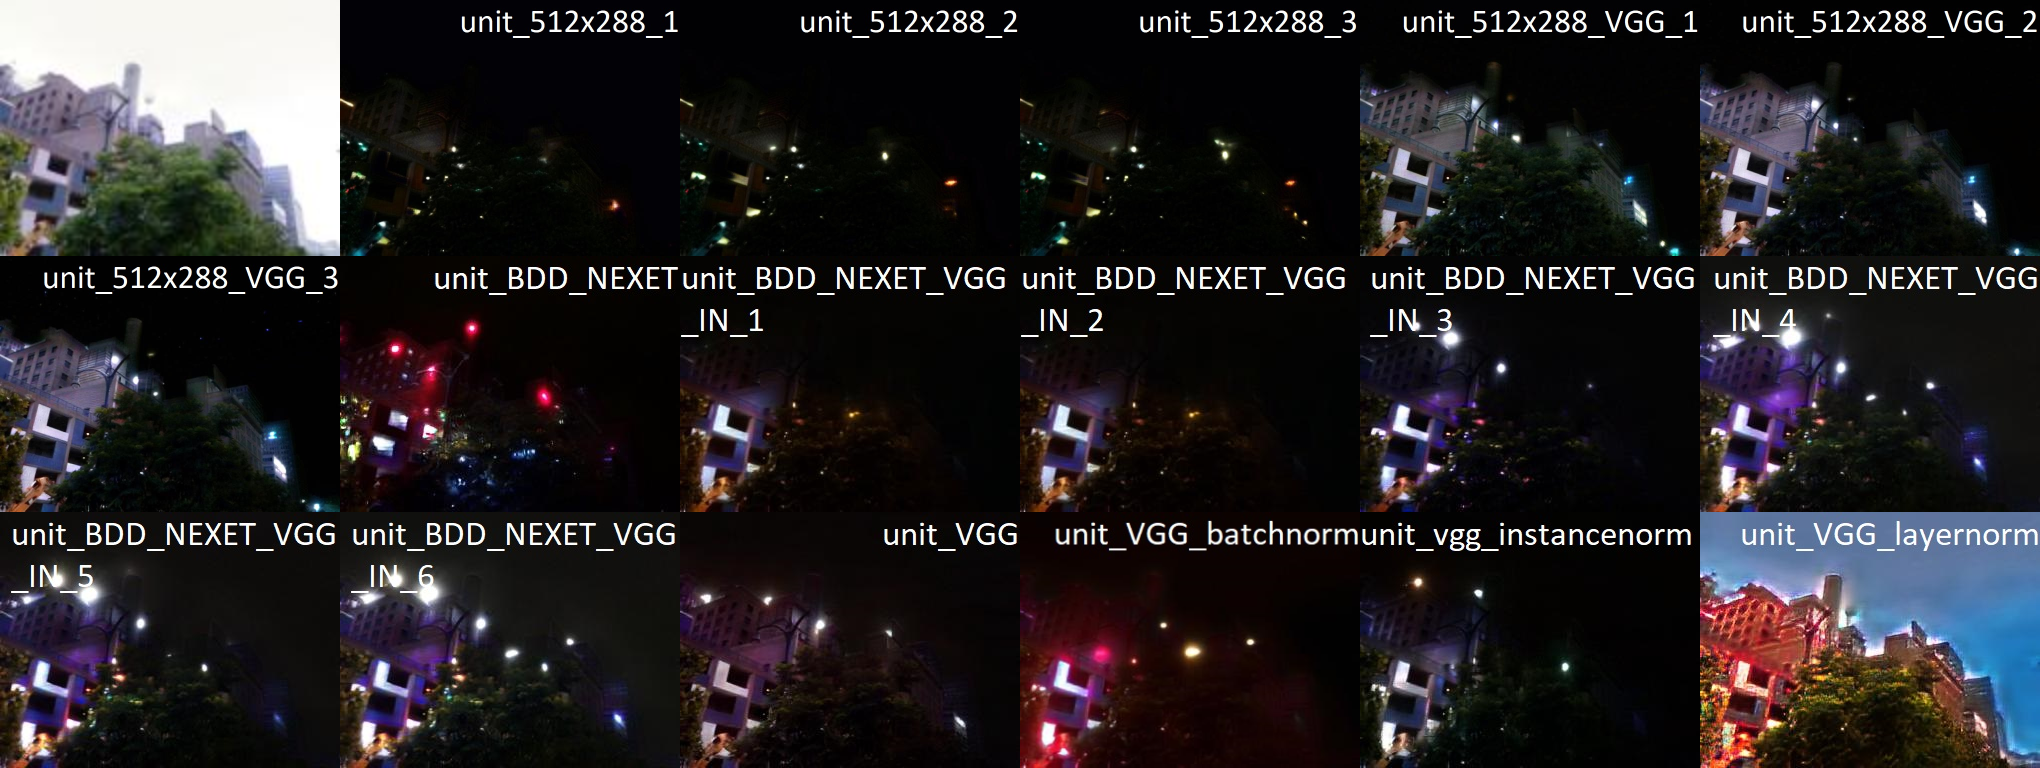

In [ ]:
cv2_imshow(collage)

The chosen model was the unit_512x288_VGG_1

# Creation of the pitts30k_night dataset

We convert the train/database and train/queries folders to night.
The pitts30k_night dataset contains the train folder which only has night images and the val and test folder are left unchanged with respect to the original pitts30k dataset.

In [ ]:
!python test_mine.py --trainer=UNIT --input_image="no" --input_folder="/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k/images/train/database/" --config="/content/drive/MyDrive/code/benchmarking_vg/synthetic_images/UNIT/UNIT PT models/UNIT_512x288_VGG/config.yaml" --output_folder="/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_night/images/train/database" --checkpoint="/content/drive/MyDrive/code/benchmarking_vg/synthetic_images/UNIT/UNIT PT models/UNIT_512x288_VGG/gen_00256000.pt" --a2b=1

In [ ]:

!python test_mine.py --trainer=UNIT --input_image="no" --input_folder="/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k/images/train/queries/" --config="/content/drive/MyDrive/code/benchmarking_vg/synthetic_images/UNIT/UNIT PT models/UNIT_512x288_VGG/config.yaml" --output_folder="/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_night/images/train/queries" --checkpoint="/content/drive/MyDrive/code/benchmarking_vg/synthetic_images/UNIT/UNIT PT models/UNIT_512x288_VGG/gen_00256000.pt" --a2b=1

# Creation of the pitts30k_dn dataset

We need to create a dataset (for the training) that contains both the day and night images. To do this we merge the original pitts30k dataset with the previously generated pitts30k_night dataset.
To recap:
- the final pitts30k_dn/train/database contains all the pictures in pitts30k/train/database + all the pictures in pitts30k_night/train/database.
- the final pitts30k_dn/train/queries contains all the pictures in pitts30k/train/queries + all the pictures in pitts30k_night/train/queries.
- val and test folders are the same ones found in pitts30k 


In [ ]:
def copyFilesF2F(source_folder, destination_folder): #function to copy all files from a folder to another
  import os
  import glob
  import shutil

  files = []
  for filepath in glob.glob(source_folder+"*.jpg"):
    files.append(filepath)
  
  names = []
  for el in files:
    names.append(os.path.basename(el))
  
  for filename in names:
    source = source_folder+filename
    destination = destination_folder+filename
    shutil.copy(source,destination)

In [ ]:
def numImagesF(folder_path):  #number of images in a folder
  import glob
  files = []
  for filepath in glob.glob(folder_path+"*.jpg"):
    files.append(filepath)
  print("The folder has " + str(len(files)) + " pictures")

In [ ]:
#copy files from pitts30k/images/train/database to
#                pitts30k_dn/images/train/database
src = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k/images/train/database/'
dst = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/database/'
copyFilesF2F(src,dst)

In [ ]:
#copy files from pitts30k_night/images/train/database to
#                pitts30k_dn/images/train/database
src = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_night/images/train/database/'
dst = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/database/'
copyFilesF2F(src,dst)


In [ ]:
#copy files from pitts30k/images/train/queries to
#                pitts30k_dn/images/train/queries
src = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k/images/train/queries/'
dst = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/queries/'
copyFilesF2F(src,dst)

In [ ]:
#copy files from pitts30k_night/images/train/queries to
#                pitts30k_dn/images/train/queries
src = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_night/images/train/queries/'
dst = '/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/queries/'
copyFilesF2F(src,dst)

In [ ]:
#check if all the files have been copied correctly. 
#The train folders of pitts30k and pitts30k_night have 10010 pictures, the pitts30k_dn should have 20022
#The queries folders have 7417 pictures so the pitts30k_dn should have 14834
numImagesF('/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/database/')
numImagesF('/content/drive/MyDrive/code/datasets_vg/datasets/pitts30k_dn/images/train/queries/')

The folder has 20020 pictures
The folder has 14832 pictures
